# WPO 3
[Oefening 2](#oef2)

[Oefening 4](#oef4)
***

In [1]:
import numpy as np # numerical calculations in python
from scipy.optimize import fmin, fsolve
from scipy.misc import derivative
import matplotlib.pyplot as plt # package for plotting
from matplotlib import rc
#rc('text', usetex=True)

# allow to show plots inline
%matplotlib inline 

<a id="oef2"></a> 
## Oefening 2:
Beschouw een experimentele opstelling waarbij je de zwaartekrachtversnelling meet aan de hand van een balletje dat losgelaten wordt door een elektromagneet. Je meet de tijd t die het balletje nodig heeft om een afstand $d = \frac{1}{2}gt^2$ te overbruggen. Je bekomt volgende resultaten, met een onzekerheid van 0.01 s.

| tijd (s) | 0.16 | 0.40 | 0.58 | 0.72 |0.97 |
|---|---|---|---|---|---|
| afstand (m) | 0.20 | 1.00 | 2.00 | 3.00 |5.00 |

Schat de zwaartekrachtversnelling met onzekerheid, m.b.v. de kleinste kwadraten methode, waarbij je veronderstelt dat
<ol>
  <li>de tijden zijn zoals hierboven.</li>
  <li>het magneetveld een onbekende maar vaste tijd nodig heeft om tot nul te zakken en het balletje los te laten.</li>
</ol>

### Deel 1: de tijden zijn zoals hierboven


In [2]:
tijd = np.asarray([0.16, 0.40, 0.58, 0.72, 0.97])
afstand = np.asarray([0.20,1.00,2.00,3.00,5.00])
dt = [0.01]*len(tijd)

In [3]:
def time_func_1(x,g):
    # tijd in functie van de positie met g als parameter

chi2_fun_1 = lambda q: # fill
# minimaliseer de chi2 en bepaal g

IndentationError: expected an indented block after function definition on line 1 (2599724020.py, line 4)

#### Onzekerheid op g?

### Deel 2: het magneetveld een onbekende maar vaste tijd nodig heeft om tot nul te zakken en het balletje los te laten.

In [4]:
def time_func_2(x,g,T):
    # hoe ziet de functie eruit al je nog een extra onbekende tijd T nodig hebt om het balletje te laten vallen?

chi2_fun_2 = lambda q: # fill
# minimaliseer de chi2 en bepaal g en T

IndentationError: expected an indented block after function definition on line 1 (894023720.py, line 4)

In [5]:
# Plot de twee fits samen met de data

### conclusie: Wat leer je nu uit je twee fits? Welke komt het beste overeen met de data (visueel)? Wat leert de waarde van T ons?

### Bepaal nu nog de onzekerheden op g en T voor het tweede geval

In [6]:
# onzekerheid op g en T

In [7]:
# toon visueel hoe de chi2 varieert met je parameters mu en sigma, 
# waar het minimum zich bevindt en waar het onzekerheidsinterval zich bevindt.

<a id="oef4"></a> 
## Oefening 4:
Gegeven onderstaande dataset metingen. De onderliggende kansverdelingsfunctie bestaat uit een <font color='red'> exponentiele achtergrond </font> en een <font color='blue'> gaussisch verdeelde piek </font> die de massa van een deeltje vertegenwoordigt,

### $f_{X}(x|m,f) = \color{red}{ 0.01 \cdot e^{-0.01x} \cdot (1-f)} + \color{blue}{\frac{e^{-\frac{1}{800}(x-m)^{2}} \cdot f}{20\sqrt{2\pi}}}$

Bepaal met behulp van de kleinste kwadarten methode de massa $m$ van het deeltje, alsook de verhouding $f = \frac{N_{sig}}{N_{sig} + N_{bkg}}$ (dus de fractie signaal events t.o.v. signaal+achtergrond). Bepaal ook de onzekerheden aan de hand van de grafische methode.

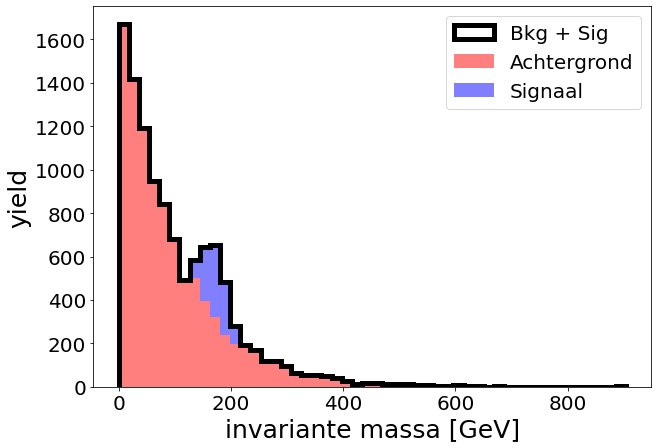

In [8]:
mass = 172.5 # [GeV\c^2]
resolution_mass = 20
Signaal = np.random.normal(mass,resolution_mass,1000)
Achtergrond = np.random.exponential(100,10000)
AlleMetingen = np.concatenate((Achtergrond,Signaal))

fig = plt.figure(figsize=[10,7]) 
ax = fig.add_subplot(1, 1, 1)
ax.hist(AlleMetingen, 50,histtype="step", linewidth=5, color="black",label="Bkg + Sig")
ax.hist([Achtergrond,Signaal], 50,histtype="barstacked", linewidth=2,stacked=True,color=["red","blue"],alpha=0.5,label=["Achtergrond","Signaal"])
plt.xlabel('invariante massa [GeV]',fontsize=25);
plt.ylabel('yield',fontsize=25);
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
plt.legend(loc="best",fontsize=20);

#### Bijvraag 1: Zoek eens op met welk elementair deeltje de massa van ongeveer $172.5 \, GeV/c^2$ overeen komt?

### Onderstaande afbeelding komt uit een publicatie van de meting van de massa van het Higgs boson met het CMS experiment. De massa van dit deeltje werd reeds heel nauwkeurig gemeten en ligt rond de $125 \, GeV/c^2$, zoals je kan zien op de afbeelding. Deze analyze zoekt naar het verval van een Higgs boson in twee fotonen (lichtdeeltjes), en de grafiek toont je de "invariante massa" van die twee fotonen. Uiteraard zijn er ook andere processes die twee fotonen kunnen opleveren, maar in dat geval ligt de massa niet rond de $125 \, GeV/c^2$ (exponentieel dalende achtergrond)
##### (je ziet dat we soms de factor 'c' laten vallen (we zetten c gelijk aan 1) en dus worden ook massa's uitgedrukt in GeV --> Natural units)
<img src="./HIG-19-004-pas.png" width="500">

### bepaal nu m en f met de kleinste kwadraten methode, alsook hun onzekerheden
tip: Je zal je data weer in een histogram moeten steken. Je kansverdelingsfunctie staat in de opgave. Voor de rest is deze opgave gelijkaardig aan oefening twee van de tweede WPO sessie!

tip2: de onzekerheid (bijvoorbeeld op de massa m) via de visuele methode voor kleinste kwadraten schatter voldoet aan:

$\chi^2(m,\hat{f_{LS}}) - \chi^2(\hat{m_{LS}},\hat{f_{LS}}) -s^2 = 0$,

met $\hat{m_{LS}},\hat{f_{LS}}$ je kleinste kwadraten schatters voor m en f en waarbij s het aantal standaardafwijkingen is. Je zoekt met andere woorden naar de punten waar de $\Delta \chi^{2}(m,\hat{f}) = \chi^2(m,\hat{f_{LS}}) - \chi^2(\hat{m_{LS}},\hat{f_{LS}})$ = 1 of 4 of 9 (voor 1$\sigma$, 2$\sigma$ en 3$\sigma$ respectievelijk)